In [6]:
#import sudoku-to-cnf-alt

# Ethan Wipond
# v00773575

# An alterate encoding to sudoku-to-cnf.py, for the first extended 
# task. 

import sys, getopt

def main(argv):
	inputfile = ''
	outputfile = ''
	try: 
		opts, args = getopt.getopt(argv, 'hi:o:', ["ifile=", "ofile="])
	except getopt.GetoptError:
		print 'sudoku-to-cnf.py -i <inputfile> -o <outputfile>'
		sys.exit(2)
	for opt, arg in opts:
		if opt == '-h':
			print 'sudoku-to-cnf -i <inputfile> -o <outputfile>'
			sys.exit()
		elif opt in ("-i", "--ifile"):
			inputfile = arg
		elif opt in ("-o", "--ofile"):
			outputfile = arg

	build_clauses(inputfile, outputfile)


def build_clauses(inputfile, outputfile):	
	given_puzzle_string = read_input(inputfile);
	clauses = []	

	clauses += get_clauses_from_puzzle(given_puzzle_string)
	clauses += get_clauses_from_rule_1()
	clauses += get_clauses_from_rule_2()
	clauses += get_clauses_from_rule_3()
	clauses += get_clauses_from_rule_4()
	clauses += get_clauses_from_rule_5()
	clauses += get_clauses_from_rule_6()	
	clauses += get_clauses_from_rule_7()
	clauses += get_clauses_from_rule_8()

	write_output(outputfile, clauses);


def read_input(filename):
	sudoku_puzzle = ""
	with open(filename) as f:
	  while True:
	    c = f.read(1)
	    if not c:
	      break
	    sudoku_puzzle += c
	sudoku_puzzle = ''.join(sudoku_puzzle.split()) 
	return sudoku_puzzle


def get_clauses_from_puzzle(puzzle_string):
	result = []
	for index in range(len(puzzle_string)):
		if puzzle_string[index] in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
			# puzzle_string[i] is a value given in the puzzle
			x = int(index / 9) + 1
			y = index % 9 + 1
			z = int(puzzle_string[index])
			variable = three_subscript_to_variable(x, y, z)
			result.append("{0} 0".format(variable))
	return result

def get_clauses_from_rule_1():
	# Every cell contains at least one number
	result = []
	for x in range(1,10):
		for y in range(1,10):
			this_clause = ""
			for z in range(1, 10):
				variable = three_subscript_to_variable(x, y, z)
				this_clause += "{0} ".format(variable) 
			this_clause += "0"
			result.append(this_clause)
	return result


def get_clauses_from_rule_2():
	# 2) Each number appears at most once in every row
	result = []
	for y in range(1,10):
		for z in range(1,10):
			for x in range(1,9):
				for i in range(x+1, 10):
					variable_1 = three_subscript_to_variable(x, y, z)
					variable_2 = three_subscript_to_variable(i, y, z)
					this_clause = "-{0} -{1} 0".format(variable_1, variable_2)
					result.append(this_clause)
	return result


def get_clauses_from_rule_3():
# 3) Each number appears at most once in every column
	result = []
	for x in range(1,10):
	 	for z in range(1,10):
	 		for y in range(1,9):
	 			for i in range(y+1, 10):
	 				variable_1 = three_subscript_to_variable(x, y, z)
	 				variable_2 = three_subscript_to_variable(x, i, z)
	 				this_clause = "-{0} -{1} 0".format(variable_1, variable_2)
	 				result.append(this_clause)
	return result


def get_clauses_from_rule_4():
# 4) Each number appears at most once in every 3x3 subgrid
	result = []
	for z in range(1,10):
		for i in range(0,3):
			for j in range(0,3):
				for x in range(1,4):
					for y in range(1,4):
						for k in range(y+1, 4):
							variable_1 = three_subscript_to_variable((3 * i + x), (3 * j + y), z)
							variable_2 = three_subscript_to_variable((3 * i + x), (3 * j + k), z)
							this_clause = "-{0} -{1} 0".format(variable_1, variable_2)
							result.append(this_clause)
	
	for z1 in range(1, 10):
		for i1 in range(0, 3):
			for j1 in range(0, 3):
				for x1 in range(1,4):
					for y1 in range(1,4):
						for k1 in range(x1+1, 4):
							for l1 in range(1, 4):
								variable_1 = three_subscript_to_variable((3 * i1 + x1), (3 * j1 + y1), z1)
								variable_2 = three_subscript_to_variable((3 * i1 + k1), (3 * j1 + l1), z1)
								this_clause = "-{0} -{1} 0".format(variable_1, variable_2)
								result.append(this_clause)
	return result



def get_clauses_from_rule_5():
	# There is at most one number in each entry
	result = []
	for x in range(1, 10):
		for y in range(1, 10):
			for z in range(1, 9):
				for i in range(z+1, 10):
					variable_1 = three_subscript_to_variable(x, y, z)
					variable_2 = three_subscript_to_variable(x, y, i)
					this_clause = "-{0} -{1} 0".format(variable_1, variable_2)
					result.append(this_clause)
	return result


def get_clauses_from_rule_6():
	# 2) Each number appears at least once in each row
	result = []
	for y in range(1, 10):
		for z in range(1, 10):
			this_clause = ""
			for x in range(1, 10):
				variable = three_subscript_to_variable(x, y, z)
				this_clause += "{0} ".format(variable)
			this_clause += "0"
			result.append(this_clause)
	return result


def get_clauses_from_rule_7():
# 3) Each number appears at least once in each column
	result = []
	for x in range(1, 10):
		for z in range(1, 10):
			this_clause = ""
			for y in range(1, 10):
				variable = three_subscript_to_variable(x, y, z)
				this_clause += "{0} ".format(variable)
			this_clause += "0"
			result.append(this_clause)
	return result


def get_clauses_from_rule_8():
# 4) Each number appears at least once in each three by three subgrid
	result = []
	for i in range(0, 3):
		for j in range(0, 3):
			for x in range(1, 4):
				for y in range(1, 4):
					this_clause = ""
					for z in range(1, 10):
						variable = three_subscript_to_variable((3*i + x), (3 *j + y), z)
						this_clause += "{0} ".format(variable)
					this_clause += "0"
					result.append(this_clause)
	return result



def write_output(outputfile, clauses):
	# format:
	# p cnf <# variables> <# clauses>
	# <list of clauses>
	# each clause is a list of non-zero numbers terminated by a 0
	o = open(outputfile, 'w')

	num_variables = 729
	num_clauses = len(clauses)
	o.write("p cnf {0} {1}\n".format(num_variables, num_clauses))

	for i in range(len(clauses)):
		o.write("{0}\n".format(clauses[i]))
	o.close()


def three_subscript_to_variable(x, y, z):
	return 81 * (x-1) + 9 * (y-1) + (z-1) + 1


#if __name__ == "__main__":
#   main(sys.argv[1:])

In [7]:
def build_frame_clauses():	
	clauses = []	
    #get_clauses_from_puzzle(puzzle_string)
	clauses += get_clauses_from_rule_1()
	clauses += get_clauses_from_rule_2()
	clauses += get_clauses_from_rule_3()
	clauses += get_clauses_from_rule_4()
	clauses += get_clauses_from_rule_5()
	clauses += get_clauses_from_rule_6()	
	clauses += get_clauses_from_rule_7()
	clauses += get_clauses_from_rule_8()
    
	return clauses #write_output(outputfile, clauses);

framestrings = build_frame_clauses()

def get_triples(puzzle_string):
	result = []
	for index in range(len(puzzle_string)):
		if puzzle_string[index] in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
			# puzzle_string[i] is a value given in the puzzle
			x = int(index / 9) + 1
			y = index % 9 + 1
			z = int(puzzle_string[index])
			variable = three_subscript_to_variable(x, y, z)
			result.append((x,y,z))
	return result

def triples_to_variables(triples):
    return ['{0} 0\n'.format(three_subscript_to_variable(x, y, z)) for (x,y,z) in triples]

def to_clauses(sudoku):
    return get_clauses_from_puzzle(sudoku) + build_frame_clauses()

In [16]:
#Pycosat solving:

#framestrings = build_frame_clauses()

#get_clauses_from_puzzle(given_puzzle_string)

#fh = open("frame.txt")
#lines = fh.readlines()
#fh.close()
#fh.open("givens.txt")
#givens = fh.readline()
#fh.close()

#frame = [[int(x) for x in line.split()[:-1]] for line in lines[1:]]
#givens = [[int(x)] for x in givens.split()]

#pycosat.solve(givens + frame, verbose = 5)

In [17]:

#sudokus = get_sudokus("raw_17_clue_sudokus.txt",0,True)
#o = open("shuffled_17_all.txt",'w')
#for i in range(len(sudokus)):
#    o.write(sudokus[i])
#o.close()

#fh = open("givens.txt", "w")
#for g in givens:
#    fh.write(str(g[0]) + " ")
#fh.close()
#print("done")

In [19]:
import subprocess
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas
import time

shuffle_DMACS = True

def minisat_solve(puzzle,threadnr):
    
    if (shuffle_DMACS):
        random.shuffle(puzzle)
    
    write_output("sudoku"+str(threadnr) + ".txt",puzzle) #adds the DIMACS header
    
    #The command line query:
    proc = subprocess.Popen(
        ["minisat", 
         "sudoku"+str(threadnr) + ".txt", 
         "out"+str(threadnr) + ".txt", 
         "-randomize=" + str(random.uniform(0,1)),  
         "-rnd-freq=0.8", 
         "-no-luby", 
         "-rinc=1.5", 
         "-phase-saving=0", 
         "-verbose=2"
        ], 
        stdout=subprocess.PIPE)
    
    out = proc.communicate()[0]
    return out.upper()

def minisat_strip(sudoku,puzzle,threadnr):
    minisat_strings = minisat_solve(puzzle,threadnr)
    lines = minisat_strings.split("\n")[5:]
    stats = {}
    magic_nr = 4
    started = False
    for line,nr in zip(lines,range(len(lines))):
        words = line.split()
        if not started:
            if words[0] == 'RESTARTS':
                if int(words[2]) > 1:
                    print int(words[2]),
                    print sudoku
                magic_nr = 4 + nr
                started = True
                continue
        else:
            if not words:
                break
            elif started and nr < magic_nr:
                try:
                    stats[(words[0]).lower()] = int(words[2])
                except:
                    print(minisat_strings)
                    print(sudoku)
                    print(magic_nr)
            elif nr == magic_nr:
                stats[(words[0] + "_" + words[1]).lower()] = int(words[3])
            else:
                stats[(words[0] + "_" + words[1]).lower()] = float(words[3])
    #print(stats)
    return stats

def c_b(triples):
    C_b=0
    block = list(map(lambda (x,y,z): ((x-1)//3, (y-1)//3,z), triples))
    for i in range (3):
        for j in range (3):
            n=len(list(filter(lambda (x,y,z): x==i and y==j,block)))
            C_bij=n*(n-1)/2
            #print(C_bij, n)
            C_b=C_b+C_bij
    return C_b  

def get_clusteredness(triples):
    c = 0
    R = {x:0 for x in range(1,10)}
    C = {y:0 for y in range(1,10)}
    for x in triples:
        R[x[0]]+=1
    c_row = sum(area_score_func(R[key]) for key in R)
    for y in triples:
        C[y[1]]+=1
    c_column = sum(area_score_func(C[key]) for key in C)
    
    #number clusteredness:
    C = {y:0 for y in range(1,10)}
    for y in triples:
        C[y[2]]+=1
    numb_clust = sum(area_score_func(C[key]) for key in C)
    
    C_b=0
    block = list(map(lambda (x,y,z): ((x-1)//3, (y-1)//3,z), triples))
    for i in range (3):
        for j in range (3):
            n=len(list(filter(lambda (x,y,z): x==i and y==j,block)))
            C_bij= area_score_func(n)
            #print(C_bij, n)
            C_b=C_b+C_bij
            
    Clusteredness=c_row+c_column+C_b#+numb_clust
    return Clusteredness


def load_sudokus(filename,amount,shuffle):
    fh = open(filename)
    sudokus = fh.readlines()
    if (shuffle):
        random.shuffle(sudokus)
    if amount:
        sudokus = sudokus[:amount]
    return sudokus

def read_csv(name):
    df = pandas.read_csv(name)
    df = df.drop("Unnamed: 0",axis=1)
    return df

sudoku_count = 0
def do_subtask(sudokus,part,parts,repeats): 
    t = time.time()
    
    framestrings = build_frame_clauses()
    
    global sudoku_count
    sudoku_count = 0
    
    def repeat_solve_data(sudoku):
        
        givens_tri = get_triples(sudoku)
        clusteredness = get_clusteredness(givens_tri)
        givens = triples_to_variables(givens_tri)
        
        puzzle = givens + framestrings
        
        dicts = [minisat_strip(sudoku,puzzle,part) for i in range(repeats)]
        conflicts = np.array([d["conflicts"] for d in dicts])
        decisions = np.array([d["decisions"] for d in dicts])
        
        row = [
            clusteredness,
            conflicts.mean(),
            conflicts.std(),
            conflicts.max(),
            decisions.mean(),
            decisions.std()
        ]
        
        global sudoku_count
        sudoku_count += 1
        print '.',
        if (sudoku_count%100 == 0):
            print "\n",
            print "{0} sudokus {1} times tested".format(sudoku_count,repeats),
            
        return row
    
    #continuing with do_subtask:
    task_size = len(sudokus) // parts
    
    results = pandas.DataFrame(
        [repeat_solve_data(sudoku) 
         for sudoku in sudokus[task_size * (part - 1) : task_size * part]],
        #index=range(task_size), 
        columns=[
            "clust",
            "c_avg",
            "c_std",
            "c_max",
            "d_avg",
            "d_std"
        ])
    
    print "\n",
    
    filename = "Part_{0}_of_{1}_{2}.csv".format(part,parts,time.strftime("%y%m%d_%H%M%S"))
    results.to_csv(filename)
    print(str(time.time() - t) + " seconds")
    print("{0} created and saved.\n".format(filename) )
    return results

def regular_cluster(count):
    return count * (count - 1) /2

def alternative_cluster(coutnt):
    return count

In [8]:
#Choose your data:
sudokus = load_sudokus(
    "shuffled_17_all.txt", #filename of the database
    0, #take this many, if 0 it takes all.
    False #suffle?
)

#sudokus = np.load("sudokus5000_inc_impossible5restarts.npy")
#sudokus = sudokus[:100]
#print(rescopy)
#sudokus = [sudokus[92]]

In [9]:
#Main cell:

shuffle_DMACS = True

#set the score function:
area_score_func = regular_cluster

results = do_subtask(
    sudokus, #total dataset
    2,#part to do
    4, #total number of parts
    10 #repeats per sudoku
)

print(results)
#print(read_csv("Part_1_of_1.csv"))

print("done")

. . . . .

KeyboardInterrupt: 

In [21]:
#Selected hard puzzle analysis:

#avg. 18 conflicts:
hard_puzzle = "600300080000000010000050000300042500000070400800000000040000700100600000000800000"
#avg. 41 conflicts:
very_hard_puzzle = "520006000000000701300000000000400800600000050000000000041800000000030020008700000"

print(minisat_solve("",to_clauses(very_hard_puzzle),1))

#np.save("sudokus5000_inc_impossible5restarts",np.array(sudokus))

TypeError: minisat_solve() takes exactly 2 arguments (3 given)

In [49]:
part_1=read_csv("Part_1_of_4_171001_023527.csv")
part_2=read_csv("Part_2_of_4_171001_055506.csv")
part_3=read_csv("Part_3_of_4_171001_024523.csv")
part_4=read_csv("Part_4_of_4_171001_024458.csv")
result = pandas.concat([part_1, part_2, part_3,part_4], ignore_index=True)
result.to_csv("sudoku_metric.csv")
result

,clust,c_avg,c_std,c_max,d_avg,d_std
0,30,10.3,4.775982,24,24.6,7.158212
1,33,0.0,0.000000,0,7.0,0.000000
2,30,14.6,6.118823,29,38.0,6.340347
3,32,2.6,0.489898,3,5.0,1.095445
4,32,3.2,0.979796,4,6.6,0.489898
5,29,1.4,0.489898,2,3.8,0.400000
6,31,4.0,0.000000,4,15.0,0.000000
7,29,0.0,0.000000,0,1.0,0.000000
8,33,0.0,0.000000,0,1.0,0.000000
9,31,0.0,0.000000,0,3.0,0.000000


In [64]:
import scipy

ImportError: No module named scipy

31.4672132815
2.02730498402


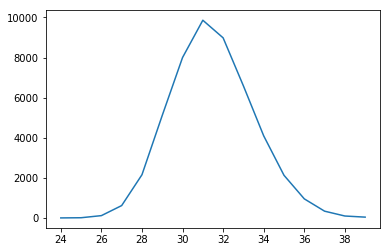

In [20]:
#Histogram over all clusterednesses:
all_sudokus = load_sudokus("shuffled_17_all.txt",0,False)
clust = [get_clusteredness(get_triples(sudoku)) for sudoku in sudokus]
print np.mean(clust)
print np.std(clust)
plt.plot(range(min(clust),max(clust)),np.histogram(clust,bins=range(min(clust),max(clust) + 1))[0])
plt.show()

mean: 2.78541547978
max: 78.0


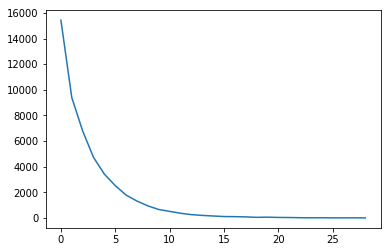

In [53]:
def plot_histogram(colname,bins):
    
    plt.plot(bins[:-1],np.histogram(result[colname],bins=bins)[0])
    print("mean: " + str(result[colname].mean()))
    print("max: " + str(result[colname].max()))
    plt.show()
    return

plot_histogram("c_avg",range(30))

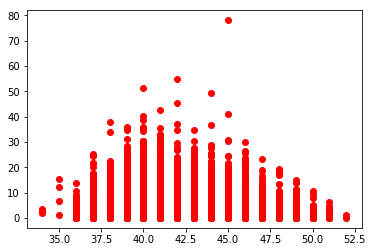

In [18]:
def plot_upon(colnameY,colnameX):
    X = results[colnameX]
    Y = results[colnameY]
    X = clust[:-3]
    plt.plot(X,Y,"ro")
    plt.show()
    return

plot_upon("c_avg","clust")

In [16]:
#get_clusteredness(get_triples(very_hard_puzzle))
results = read_csv("sudoku_metric.csv")